# Reproduce of 2023-kim 

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Limit to 4 cores
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from scipy import integrate
import math
import S4
import time

In [2]:
spectrum_print = 1

-0.12 -0.12
-0.12 -0.06
-0.12 0.0
-0.12 0.06
-0.12 0.12
-0.06 -0.06
-0.06 0.0
-0.06 0.06
-0.06 0.12
0.0 -0.12
0.0 0.06
0.06 -0.12
0.06 -0.06
0.06 0.0
0.06 0.12
0.12 0.12
Elapsed time = 21.87891459465027s


0.3755982912731317

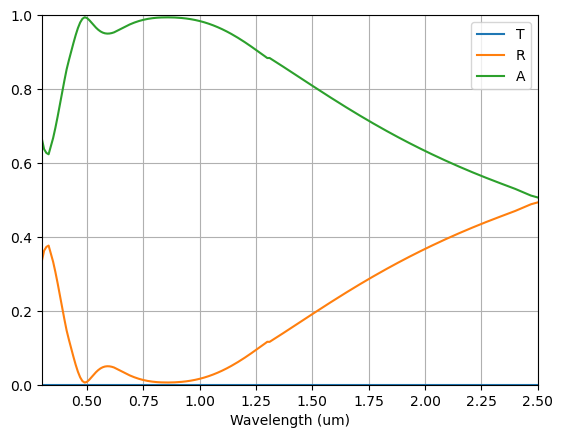

In [9]:
def s4_kim_calculation(x):
    ## Consider only two materials
    ns = 5  ## ns*ns square
    for i in range(ns**2):
        x_pos = np.mod(i,ns) - int(ns/2)
        y_pos = int(i/ns) -  int(ns/2) 
        #print(f'({x_pos},{y_pos})')
    lx = 0.3
    ly = 0.3
    S = S4.New(Lattice=((lx,0),(0,ly)),NumBasis = 50)
    S.SetMaterial(Name = 'SiO2',Epsilon = (1.45 )**2)
    S.SetMaterial(Name = 'TiN',Epsilon = (2 + 0.9j)**2)
    S.SetMaterial(Name = 'Vacuum',Epsilon = (1 )**2)
    
    sio2_array = np.array([2.49067345, 2.48061825, 2.47231977, 2.46433348, 2.45748062, 2.45103316
    ,2.44529706 ,2.4400007  ,2.43514266 ,2.4307391  ,2.42658145 ,2.42286963
    ,2.41927813 ,2.41611983 ,2.41302137 ,2.41027318 ,2.40759917 ,2.40516966
    ,2.40283956 ,2.4006777  ,2.39863361 ,2.39669814 ,2.39488974 ,2.39314706
    ,2.3915378  ,2.38996022 ,2.38851736 ,2.38709422 ,2.38578153 ,2.38449474
    ,2.38328909 ,2.38211995 ,2.38100771 ,2.37993884 ,2.37890844 ,2.37792688
    ,2.37696841 ,2.37606184 ,2.37516679 ,2.37432599 ,2.37349246 ,2.37270306
    ,2.37192521 ,2.37117998 ,2.3704505  ,2.3697446  ,2.36905796 ,2.36838711
    ,2.36773784 ,2.36709831 ,2.36648224 ,2.3658707  ,2.36528366 ,2.36470009
    ,2.36413601 ,2.3635774  ,2.36303345 ,2.36249711 ,2.36197122 ,2.3614544
    ,2.3609447  ,2.3604453  ,2.35995012 ,2.35946597 ,2.35898381 ,2.35851325
    ,2.35804418 ,2.35758404 ,2.35712662 ,2.35667579 ,2.35622851 ,2.35578592
    ,2.35534777 ,2.3549126  ,2.35448196 ,2.3540533  ,2.35362977 ,2.35320685
    ,2.35278893 ,2.35237192 ,2.3519584  ,2.35154607 ,2.35113646 ,2.35072816
    ,2.3503218  ,2.34991709 ,2.34951348 ,2.34911146 ,2.34871015 ,2.34831049
    ,2.34791104 ,2.34751302 ,2.34711525 ,2.34671834 ,2.34632167 ,2.34592553
    ,2.3455296  ,2.3451339  ,2.34473828 ,2.34434273 ,2.34394707 ,2.34355139
    ,2.34315533 ,2.34275925 ,2.34236252 ,2.34196564 ,2.34156805 ,2.34117016
    ,2.34077152 ,2.34037223 ,2.33997232 ,2.33957154 ,2.33917018 ,2.33876751
    ,2.33836453 ,2.33795991 ,2.33755495 ,2.3371482  ,2.33674104 ,2.33633214
    ,2.33592259 ,2.33551146 ,2.33509915 ,2.33468565 ,2.33427064 ,2.33385466
    ,2.33343656 ,2.33301796 ,2.33259687 ,2.33217526 ,2.33175107 ,2.33132631
    ,2.33089918 ,2.33047085 ,2.33004069 ,2.32960892 ,2.32917555 ,2.32874023
    ,2.32830364 ,2.32786438 ,2.32742448 ,2.3269815  ,2.32653786 ,2.32609106
    ,2.32564358 ,2.32519324 ,2.32474147 ,2.32428751 ,2.32383171 ,2.32337407
    ,2.32291378 ,2.32245237 ,2.32198789 ,2.32152267 ,2.32105351 ,2.32058398
    ,2.32011077 ,2.31963677 ,2.31915955 ,2.3186807  ,2.3181994  ,2.31771604
    ,2.31723061 ,2.31674224 ,2.31625263 ,2.3157596  ,2.31526575 ,2.31476756
    ,2.31426898 ,2.31376645 ,2.31326262 ,2.3127557  ,2.31224696 ,2.31173547
    ,2.31122173 ,2.31070575 ,2.31018982 ,2.30967395 ,2.30915814 ,2.30864239
    ,2.30812669 ,2.30761106 ,2.30709548 ,2.30657996 ,2.30606449 ,2.30554909
    ,2.30503373 ,2.30451844 ,2.30400321 ,2.30348803 ,2.30297291 ,2.30245785
    ,2.30194285 ,2.3014279  ,2.30091301 ,2.30039818 ,2.29988341 ,2.29936869
    ,2.29885403 ,2.29833944 ,2.29782489 ,2.29731041 ,2.29679598 ,2.29628161
    ,2.2957673  ,2.29525304 ,2.29473884 ,2.2942247  ,2.29371062 ,2.2931966
    ,2.29268263 ,2.29216872 ,2.29165487 ,2.29114108 ,2.29062734 ,2.29011366
    ,2.28960004 ,2.28908648 ,2.28857297 ,2.28805952 ,2.28754613])



    tin_array =np.array([  3.5839  +5.8111j,   3.64    +5.5842j,   3.6005  +5.3395j
    ,   3.6005  +5.3395j ,  3.5177  +4.8637j ,  3.4745  +4.6325j
    ,   3.2937  +4.4453j ,  3.0211  +4.2884j ,  2.7576  +4.1323j
    ,   2.5032  +3.9771j ,  2.258   +3.8229j ,  2.0219  +3.6696j
    ,   1.6901  +3.6959j ,  1.3062  +3.7944j ,  0.92001 +3.8735j
    ,   0.53142 +3.9333j ,  0.14047 +3.9738j , -0.25285 +3.9949j
    ,  -0.64852 +3.9968j , -1.0466  +3.9794j , -1.3876  +4.0559j
    ,  -1.6538  +4.2921j , -1.9339  +4.5315j , -2.2278  +4.7742j
    ,  -2.5356  +5.0201j , -2.8573  +5.2693j , -3.1929  +5.5217j
    ,  -3.5424  +5.7773j , -3.9057  +6.0362j , -4.283   +6.2984j
    ,  -4.6741  +6.5638j , -5.0791  +6.8324j , -5.496   +7.1043j
    ,  -5.726   +7.3802j , -5.9608  +7.6613j , -6.2002  +7.9476j
    ,  -6.4444  +8.2392j , -6.6933  +8.5361j , -6.9468  +8.8381j
    ,  -7.2051  +9.1455j , -7.468   +9.458j  , -7.7357  +9.7758j
    ,  -8.0081 +10.099j  , -8.2851 +10.427j  , -8.5669 +10.761j
    ,  -8.8534 +11.099j  , -9.1446 +11.443j  , -9.4404 +11.793j
    ,  -9.741  +12.147j  ,-10.046  +12.507j  ,-10.356  +12.872j
    , -10.671  +13.242j  ,-10.99   +13.618j  ,-11.255  +13.96j
    , -11.406  +14.231j  ,-11.557  +14.504j  ,-11.71   +14.78j
    , -11.864  +15.058j  ,-12.018  +15.339j  ,-12.173  +15.623j
    , -12.33   +15.908j  ,-12.487  +16.197j  ,-12.645  +16.488j
    , -12.804  +16.781j  ,-12.963  +17.077j  ,-13.124  +17.375j
    , -13.285  +17.676j  ,-13.448  +17.98j   ,-13.611  +18.286j
    , -13.775  +18.594j  ,-13.94   +18.905j  ,-14.106  +19.218j
    , -14.273  +19.534j  ,-14.441  +19.853j  ,-14.61   +20.174j
    , -14.779  +20.497j  ,-14.949  +20.823j  ,-15.121  +21.152j
    , -15.293  +21.483j  ,-15.466  +21.816j  ,-15.64   +22.152j
    , -15.814  +22.49j   ,-15.99   +22.831j  ,-16.167  +23.175j
    , -16.344  +23.521j  ,-16.523  +23.87j   ,-16.702  +24.221j
    , -16.882  +24.574j  ,-17.063  +24.93j   ,-17.245  +25.289j
    , -17.427  +25.65j   ,-17.611  +26.013j  ,-17.796  +26.379j
    , -17.981  +26.748j  ,-18.167  +27.118j  ,-18.349  +27.407j
    , -18.532  +27.697j  ,-18.716  +27.989j  ,-18.901  +28.283j
    , -19.087  +28.578j  ,-19.273  +28.874j , -18.69700931+28.86395897j
     ,-18.77296649+29.11785824j, -18.84893713+29.37276448j
     ,-18.92491562+29.628688j  , -19.00089622+29.88563922j
     ,-19.07689036+30.14359732j, -19.15289235+30.4025727j
     ,-19.22889636+30.66257588j, -19.30491401+30.92358584j
     ,-19.38093951+31.18561308j, -19.45696693+31.44866821j
     ,-19.53300809+31.71273003j, -19.60905709+31.97780913j
     ,-19.68510793+32.24391622j, -19.76117259+32.5110299j
     ,-19.8372451 +32.77916086j, -19.91331935+33.04831991j
     ,-19.98940752+33.31848545j, -20.06550353+33.58966826j
     ,-20.14160119+33.86187927j, -20.21771287+34.13509666j
     ,-20.29383239+34.40933134j, -20.36995346+34.6845943j
     ,-20.44608864+34.96086356j, -20.52223168+35.23815009j
     ,-20.59837616+35.51646501j, -20.67453485+35.79578613j
     ,-20.75070138+36.07612452j, -20.82686927+36.35749139j
     ,-20.90305147+36.63986437j, -20.97924152+36.92325463j
     ,-21.05543282+37.20767345j, -21.13163852+37.49309829j
     ,-21.20785207+37.77954041j, -21.28406679+38.06701119j
     ,-21.360296  +38.35548789j, -21.43653306+38.64498186j
     ,-21.51277118+38.9355046j , -21.5890239 +39.22703316j
     ,-21.66528446+39.51957899j, -21.741546  +39.81315368j
     ,-21.81782223+40.1077341j , -21.8941063 +40.4033318j
     ,-21.97039125+40.69995845j, -22.04669098+40.99759072j
     ,-22.12299856+41.29624028j, -22.19930691+41.59591888j
     ,-22.27563015+41.89660302j, -22.35196124+42.19830443j
     ,-22.42829301+42.50103499j, -22.50463975+42.80477099j
     ,-22.58099434+43.10952426j, -22.65734953+43.41530678j
     ,-22.73371978+43.72209463j, -22.81009788+44.02989977j
     ,-22.88647647+44.33873424j, -22.96287023+44.64857396j
     ,-23.03927183+44.95943095j, -23.11567384+45.27131738j
     ,-23.1920911 +45.58420895j, -23.26851622+45.8981178j
     ,-23.34494163+46.21305619j, -23.4213824 +46.52899962j
     ,-23.49783102+46.84596033j, -23.57427985+47.16395067j
     ,-23.65074413+47.48294597j, -23.72721625+47.80295854j
     ,-23.80368849+48.12400084j, -23.88017628+48.44604799j
     ,-23.95667191+48.76911242j, -24.03316756+49.09320667j
     ,-24.10967885+49.41830569j, -24.18619799+49.74442198j
     ,-24.26271706+50.07156819j, -24.33925185+50.39971906j
     ,-24.4157945 +50.72888721j, -24.49233697+51.05908537j
     ,-24.56889528+51.39028811j, -24.64546143+51.72250812j
     ,-24.72202732+52.05575824j, -24.79860913+52.39001283j
     ,-24.87519879+52.7252847j , -24.95178808+53.06158677j
     ,-25.0283934 +53.39889323j, -25.10500657+53.73721696j
     ,-25.18161928+54.07657099j, -25.2582481 +54.4169293j
     ,-25.33488477+54.75830489j, -25.41152089+55.10071088j
     ,-25.48817323+55.44412105j, -25.56483341+55.7885485j
     ,-25.64149294+56.13400644j, -25.71816878+56.48046847j
     ,-25.79485246+56.82794778j, -25.8715354 +57.17645768j
     ,-25.94823475+57.52597157j, -26.02494194+57.87650274j
     ,-26.1016483 +58.22806459j, -26.17837115+58.58063034j
     ,-26.25510185+58.93421337j, -26.33183161+59.28882718j
     ,-26.40857797+59.64444479j, -26.48533218+60.00107968j
     ,-26.56208536+60.35874544j, -26.63885522+60.71741492j
     ,-26.71563293+61.07710166j, -26.79240952+61.43781938j
     ,-26.86920289+61.79954071j, -26.94600411+62.16227932j
     ,-27.1552835 +62.32414493j, -27.36507233+62.48609059j
     ,-27.57537062+62.64811629j, -27.78617836+62.81022203j
     ,-27.99749555+62.97240782j, -28.20932219+63.13467366j
     ,-28.42165828+63.29701954j, -28.63450382+63.45944547j
     , -28.63450382+63.45944547j      ,  -28.63450382+63.45944547j
     , -28.63450382+63.45944547j      ])
    #x_input =[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] ## trivial
    SiO2_array_index = 0
    TiN_array_index = 0
    S.AddLayer(Name = 'AirAbove',Thickness = 0, Material = 'Vacuum')
    S.AddLayer(Name = 'SiO2_d1',Thickness = 0.1, Material = 'SiO2')
    layer_name = f'qr_code_layer'
    S.AddLayer(Name = layer_name,Thickness = 0.025, Material = 'SiO2')
    dx = lx/ns
    dy = ly/ns
    ## for loop convert x_input to a qr_code structure
    offset = ns // 2
    for i in range(ns**2):
        #x_pos = (np.mod(i,ns) - int(ns/2)) * dx # 餘數
        #y_pos = (int(i/ns) -  int(ns/2) ) * dy # 商數
        
        x_pos = ((i // ns) - offset)*dx
        y_pos = ((i % ns) - offset)*dy
        if x[i] == 1:
             S.SetRegionRectangle(
             Layer = layer_name,
             Material = 'TiN',
             Center = (x_pos,y_pos),
             Angle = 0,
             Halfwidths = (dx/2,dy/2)
             )
             print(x_pos, y_pos)
             
    
    S.AddLayer(Name = 'SiO2_d3',Thickness = 0.070, Material = 'SiO2')
    S.AddLayer(Name = 'TiNBelow',Thickness = 10,Material = 'TiN')## Need to a a thick layer of TiN as infinite substrate
    S.AddLayer(Name = 'AirBelow',Thickness = 0, Material = 'Vacuum')
    #S.OutputLayerPatternPostscript(Layer = layer_name, Filename = 'qr.ps')
    # ps2pdf qr.ps qr.pdf to get pdf
    #S.OutputStructurePOVRay(Filename = 'out.pov')
    ## install povray at the terminal,and use the command to generate image
    ## povray +Iout.pov +Oout.png +W1920 +H1080 +A0.3
    
    
    S.SetExcitationPlanewave(
        IncidenceAngles=(
            0,# polar angle in [0,180)
            0 # azimuthal angle in [0,360)
        ),
        sAmplitude = 0,
        pAmplitude = 1,
        Order = 0
    )
    
    # frequency sweep
    #wavelength_space = np.linspace(0.3, 2.5, 221)
    wavelength_space = np.array([
    300.00001, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400.0001, 410, 420, 430, 440,
    450, 460, 470, 480, 490, 499.999, 510, 520, 530, 540, 550, 560, 570, 580, 590,
    600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740,
    750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890,
    900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030,
    1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150,
    1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270,
    1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390,
    1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510,
    1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630,
    1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750,
    1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870,
    1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990,
    2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100, 2110,
    2120, 2130, 2140, 2150, 2160, 2170, 2180, 2190, 2200, 2210, 2220, 2230,
    2240, 2250, 2260, 2270, 2280, 2290, 2300, 2310, 2320, 2330, 2340, 2350,
    2360, 2370, 2380, 2390, 2400, 2410, 2420, 2430, 2440, 2450, 2460, 2470,
    2480, 2490, 2500])
    wavelength_space = wavelength_space*0.001
    
    irradiance = np.array([
    1.0205E-03     ,5.0939E-02    ,2.0527E-01    ,4.7139E-01    ,5.0180E-01    ,5.2798E-01
    ,5.9817E-01    ,7.5507E-01    ,7.0077E-01    ,7.9699E-01    ,1.1141E+00    ,1.0485E+00
    ,1.1232E+00    ,8.7462E-01    ,1.3499E+00    ,1.5595E+00    ,1.5291E+00    ,1.5077E+00
    ,1.6181E+00    ,1.6224E+00    ,1.5451E+00    ,1.5481E+00    ,1.5236E+00    ,1.5446E+00
    ,1.4825E+00    ,1.5399E+00    ,1.4740E+00    ,1.4816E+00    ,1.5020E+00    ,1.3709E+00
    ,1.4753E+00    ,1.4686E+00    ,1.4739E+00    ,1.3924E+00    ,1.4340E+00    ,1.3594E+00
    ,1.3992E+00    ,1.4196E+00    ,1.3969E+00    ,1.1821E+00    ,1.2823E+00    ,1.3175E+00
    ,9.8550E-01    ,1.1285E+00    ,1.2195E+00    ,1.2341E+00    ,2.6604E-01    ,1.1608E+00
    ,1.1636E+00    ,1.0910E+00    ,1.0725E+00    ,1.0559E+00    ,8.6188E-01    ,9.1601E-01
    ,1.0157E+00    ,8.9372E-01    ,9.8816E-01    ,9.6755E-01    ,9.3957E-01    ,9.2393E-01
    ,7.4260E-01    ,6.2467E-01    ,7.4414E-01    ,4.3210E-01    ,4.7181E-01    ,1.4726E-01
    ,4.2066E-01    ,6.3461E-01    ,6.0468E-01    ,7.3227E-01    ,7.3532E-01    ,7.1914E-01
    ,6.9896E-01    ,6.9055E-01    ,6.7170E-01    ,6.5463E-01    ,6.3585E-01    ,6.0469E-01
    ,5.9722E-01    ,5.5573E-01    ,4.8577E-01    ,4.7899E-01    ,1.4189E-01    ,7.0574E-02
    ,2.5599E-01    ,1.2164E-01    ,2.8648E-01    ,4.5873E-01    ,4.4069E-01    ,4.6239E-01
    ,4.4825E-01    ,4.5336E-01    ,4.5805E-01    ,4.6003E-01    ,4.6077E-01    ,4.5705E-01
    ,4.3110E-01    ,3.8744E-01    ,4.2204E-01    ,4.1285E-01    ,3.5312E-01    ,3.0114E-01
    ,2.5872E-01    ,2.2923E-01    ,1.6831E-01    ,1.6025E-02    ,2.1404E-06    ,2.9200E-07
    ,8.1587E-05    ,4.9328E-04    ,3.2466E-09    ,4.6653E-04    ,8.2718E-03    ,6.1601E-02
    ,3.9601E-02    ,2.7412E-02    ,8.5421E-02    ,4.9678E-02    ,6.0637E-02    ,1.7478E-01
    ,2.5061E-01    ,2.7052E-01    ,2.6450E-01    ,2.5522E-01    ,2.6491E-01    ,2.6990E-01
    ,2.6568E-01    ,2.4175E-01    ,2.4464E-01    ,2.4179E-01    ,2.3810E-01    ,2.1760E-01
    ,2.3449E-01    ,2.3651E-01    ,2.1511E-01    ,2.2526E-01    ,2.2332E-01    ,2.2168E-01
    ,2.0558E-01    ,2.0523E-01    ,1.9975E-01    ,1.8790E-01    ,1.8698E-01    ,1.7407E-01
    ,1.6818E-01    ,1.6566E-01    ,1.5998E-01    ,1.4172E-01    ,1.0050E-01    ,8.8904E-02
    ,3.1828E-02    ,9.6911E-03    ,9.8755E-04    ,5.2041E-06    ,6.2703E-08    ,2.9993E-06
    ,1.1151E-05    ,2.6662E-10    ,7.7505E-05    ,2.2333E-04    ,8.6221E-07    ,2.3045E-05
    ,4.5069E-04    ,5.5242E-04    ,3.2821E-03    ,1.6727E-02    ,2.1906E-02    ,4.8847E-02
    ,7.5512E-02    ,8.5613E-02    ,3.8156E-02    ,3.9748E-02    ,4.4981E-02    ,8.4856E-02
    ,8.9781E-02    ,6.7927E-02    ,6.9193E-02    ,6.5676E-02    ,8.6812E-02    ,8.9100E-02
    ,8.6133E-02    ,8.9654E-02    ,8.7588E-02    ,8.9774E-02    ,9.0767E-02    ,8.4639E-02
    ,8.4170E-02    ,8.1996E-02    ,8.1808E-02    ,7.9068E-02    ,7.1202E-02    ,7.9315E-02
    ,7.7730E-02    ,7.5773E-02    ,7.3118E-02    ,7.1937E-02    ,6.6929E-02    ,6.4867E-02
    ,6.6288E-02    ,6.3220E-02    ,5.8824E-02    ,6.3870E-02    ,5.2031E-02    ,5.6824E-02
    ,4.5836E-02    ,4.1536E-02    ,5.0237E-02    ,3.0817E-02    ,4.2552E-02    ,3.7109E-02
    ,4.4150E-02    ,3.3813E-02    ,2.6590E-02    ,4.5099E-02    ,4.3249E-02    ,1.3611E-02
    ,3.3363E-02    ,1.6727E-02    ,8.0395E-03    ,3.5113E-03    ,7.0642E-03])
    R = wavelength_space * 0
    T = wavelength_space * 0
    i=0
    t = time.time()
    for lam in wavelength_space:
        S.SetMaterial(Name='SiO2',Epsilon=sio2_array[SiO2_array_index])
        SiO2_array_index = SiO2_array_index + 1
        S.SetMaterial(Name='TiN',Epsilon=tin_array[TiN_array_index])
        TiN_array_index = TiN_array_index + 1
        f = 1 / float(lam)
        S.SetFrequency(f)
        (forw_inc,back_inc) = S.GetPowerFlux(Layer = 'AirAbove', zOffset = 0)
        forw = S.GetPowerFlux(Layer = 'AirBelow', zOffset = 0)
        T[i] = np.abs(forw[0])
        R[i] = np.abs(back_inc)
        i +=1
        #print(i)
    elapsed = time.time()-t;
    print('Elapsed time = '+str(elapsed)+'s')
    if(spectrum_print):
        plt.plot(wavelength_space, T,label='T')
        plt.plot(wavelength_space, R,label='R')
        plt.plot(wavelength_space, 1-R-T,label='A')
    
        #plt.plot(wavelength_space, T)
        plt.xlabel('Wavelength (um)')
        plt.legend()
        plt.ylim([0,1])
        plt.xlim([0.3,2.5])
        plt.grid()
    
    solar_absorb = integrate.simps((irradiance-((1-R-T)*irradiance)), wavelength_space)
    solar_weight = integrate.simps(irradiance, wavelength_space)
    #print(solar_absorb)
    #print(solar_weight)
   

    return(5*solar_absorb/solar_weight)
#x_input =[1,0,1,1,0,0,0,1,1,1,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0] ## 25-bit from https://pubs.acs.org/doi/full/10.1021/acsami.3c08214  
x_trivial = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] ## trivial
x_input = [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1]
s4_kim_calculation(x_input)
#s4_kim_calculation(x_trivial)

In [80]:
xs = np.random.randint(2, size=(10,25))
ys = np.array([s4_kim_calculation(x) for x in xs])

-0.2 -0.1
-0.2 0.1
-0.2 0.2
-0.1 -0.2
-0.1 0.0
0.0 -0.1
0.0 0.1
0.1 0.0
0.1 0.1
0.1 0.2
0.2 -0.2
0.2 0.2
Elapsed time = 18.890785455703735s
-0.2 -0.2
-0.2 -0.1
-0.2 0.0
-0.2 0.1
-0.2 0.2
-0.1 -0.1
-0.1 0.0
-0.1 0.1
-0.1 0.2
0.0 -0.2
0.0 0.1
0.1 -0.2
0.1 -0.1
0.1 0.0
0.1 0.2
0.2 0.2
Elapsed time = 18.249916315078735s
-0.2 -0.2
-0.2 -0.1
-0.1 -0.2
-0.1 -0.1
0.0 0.1
0.0 0.2
0.1 0.1
0.2 -0.1
Elapsed time = 18.163224935531616s
-0.2 -0.1
-0.2 0.0
-0.2 0.1
-0.2 0.2
-0.1 -0.1
-0.1 0.0
0.1 0.0
0.1 0.2
0.2 -0.2
0.2 0.1
Elapsed time = 18.070415258407593s
-0.2 0.0
-0.2 0.2
-0.1 0.1
0.0 0.0
0.1 -0.1
0.1 0.1
0.2 -0.1
0.2 0.0
0.2 0.1
Elapsed time = 18.14542579650879s
-0.2 0.0
-0.2 0.2
-0.1 -0.2
-0.1 -0.1
-0.1 0.0
-0.1 0.1
-0.1 0.2
0.0 -0.2
0.0 0.0
0.0 0.1
0.0 0.2
0.1 -0.2
0.1 -0.1
0.1 0.0
0.1 0.2
0.2 -0.2
0.2 -0.1
0.2 0.2
Elapsed time = 18.386589527130127s
-0.2 -0.1
-0.2 0.2
-0.1 -0.1
-0.1 0.0
-0.1 0.2
0.0 -0.2
0.0 -0.1
0.0 0.2
0.1 -0.2
0.1 -0.1
0.1 0.0
0.1 0.1
0.1 0.2
0.2 -0.2
0.2 -0.1
0.2 0.0
Elaps

In [81]:
print(ys)
print(xs)

[0.46006364 0.42448094 0.75007491 0.49042405 0.70814979 0.63516119
 0.56709168 0.46062261 0.47985379 0.5175304 ]
[[0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1]
 [1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1]
 [1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0]
 [0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0]
 [0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0]
 [0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1]
 [0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0]
 [0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1]
 [1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0]]
